<div style="text-align:center; color:#3498db; font-size:35px; font-weight:bold;">Telco Customer Churn Analysis and Prediction</div> <br>

## Table of content

1. [Introduction](#introduction)
   - [The problem](#the-problem)
   - [The goal](#the-goal)
   - [Objectives](#objectives)
   
2. [Import Libraries and Data](#import-libraries-and-data)

3. [EDA (Exploratory Data Analysis)](#eda-exploratory-data-analysis)
   - [Understand the data](#understand-the-data)
   - [Manipulate the data](#manipulate-the-data)
   - [Visualize the data](#visualize-the-data)
   - [Insights](#insights)
   
4. [Feature Engineering](#feature-engineering)
   - [Encode categorical features](#encode-categorical-features)
   - [Scale numerical features](#scale-numerical-features)
   - [Handle imbalanced data](#handle-imbalanced-data)
   
5. [Model Selection](#model-selection)
    - [Models creation and cross validation](#models-creation-and-cross-validation)
    - [Best models evaluation](#best-models-evaluation)
    
6. [Fine-Tune Best Models](#fine-tune-best-models)

7. [Conclusion](#conclusion)
   - [Data insights](#data-insights)
   - [Model choice](#model-choice)


# 1. Introduction <a id="introduction"></a>

### The Problem <a id="the-problem"></a>
Customer churn is a critical concern for a telecommunications company due to its direct impact on revenue, high customer acquisition costs, and potential erosion of market share. Additionally, it affects the company's brand image, long-term customer value, and ability to leverage customer data for upselling efforts. Addressing churn is paramount for financial stability, market competitiveness, and sustaining investor confidence.

### The Goal <a id="the-goal"></a>
This project aims to develop a predictive model to identify customers at risk of churning. By proactively targeting these customers with retention strategies, we can significantly reduce churn rates and boost customer loyalty.

### The Objectives <a id="objectives"></a>
- Data-Driven Insights: Uncover hidden patterns and trends within the dataset.
- Churn Factor Identification: Pinpoint the key factors that trigger customer churn.
- Predictive Modeling: Develop a robust classification model to forecast customer churn.
- Model Optimization: Fine-tune the model to achieve maximum predictive accuracy.

# 2. Import libraries and data <a id="import-libraries-and-data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as Pipeline_imb

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import  recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, make_scorer

from sklearn.model_selection import cross_validate, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [6]:
filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. EDA (Exploratory Data Analysis) <a id="eda-exploratory-data-analysis"/>


#### Understand the data  <a id="understand-the-data"/>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
num_features = df.select_dtypes(include=np.number).columns
cat_features = df.select_dtypes(include=object).columns

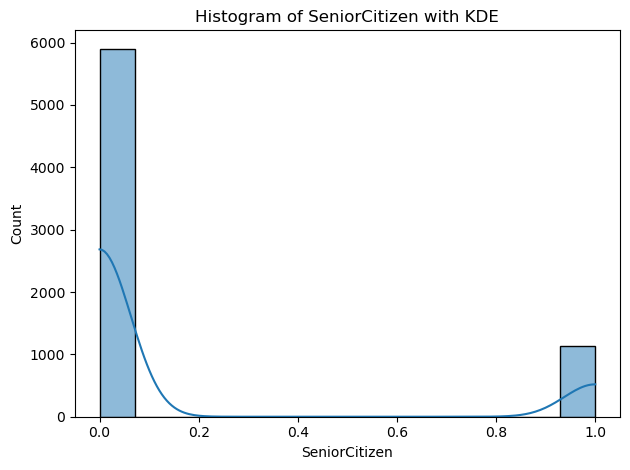

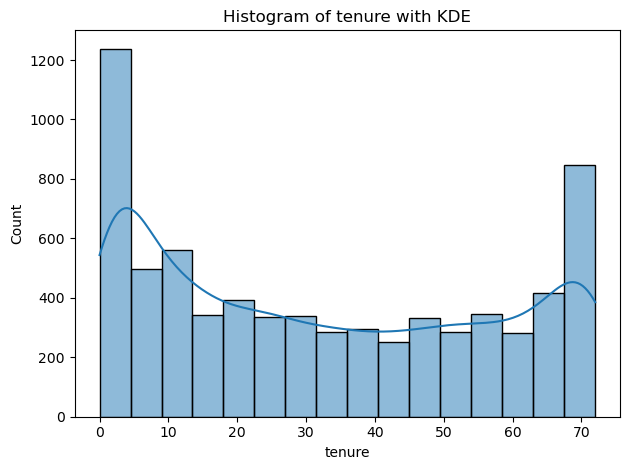

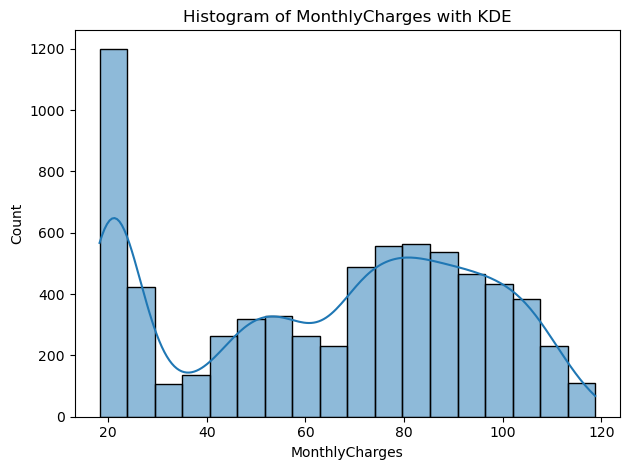

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
for feature in num_features: 
    sns.histplot(data=df, x=feature, kde=True)
    plt.title("Histogram of {} with KDE".format(feature))
    plt.tight_layout()
    plt.show()
    
df[num_features].describe().T

In [13]:
table = []
for feature in cat_features:
    data = df[feature]
    table.append([data.name, data.nunique(), data.unique()])
print(tabulate(table, headers=["Feature", "Num. of Categories", "Categories"], tablefmt="pretty"))

+------------------+--------------------+-----------------------------------------------------------------------+
|     Feature      | Num. of Categories |                              Categories                               |
+------------------+--------------------+-----------------------------------------------------------------------+
|    customerID    |        7043        | ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD' |
|                  |                    |                             '3186-AJIEK']                             |
|      gender      |         2          |                           ['Female' 'Male']                           |
|     Partner      |         2          |                             ['Yes' 'No']                              |
|    Dependents    |         2          |                             ['No' 'Yes']                              |
|   PhoneService   |         2          |                             ['No' 'Yes']      

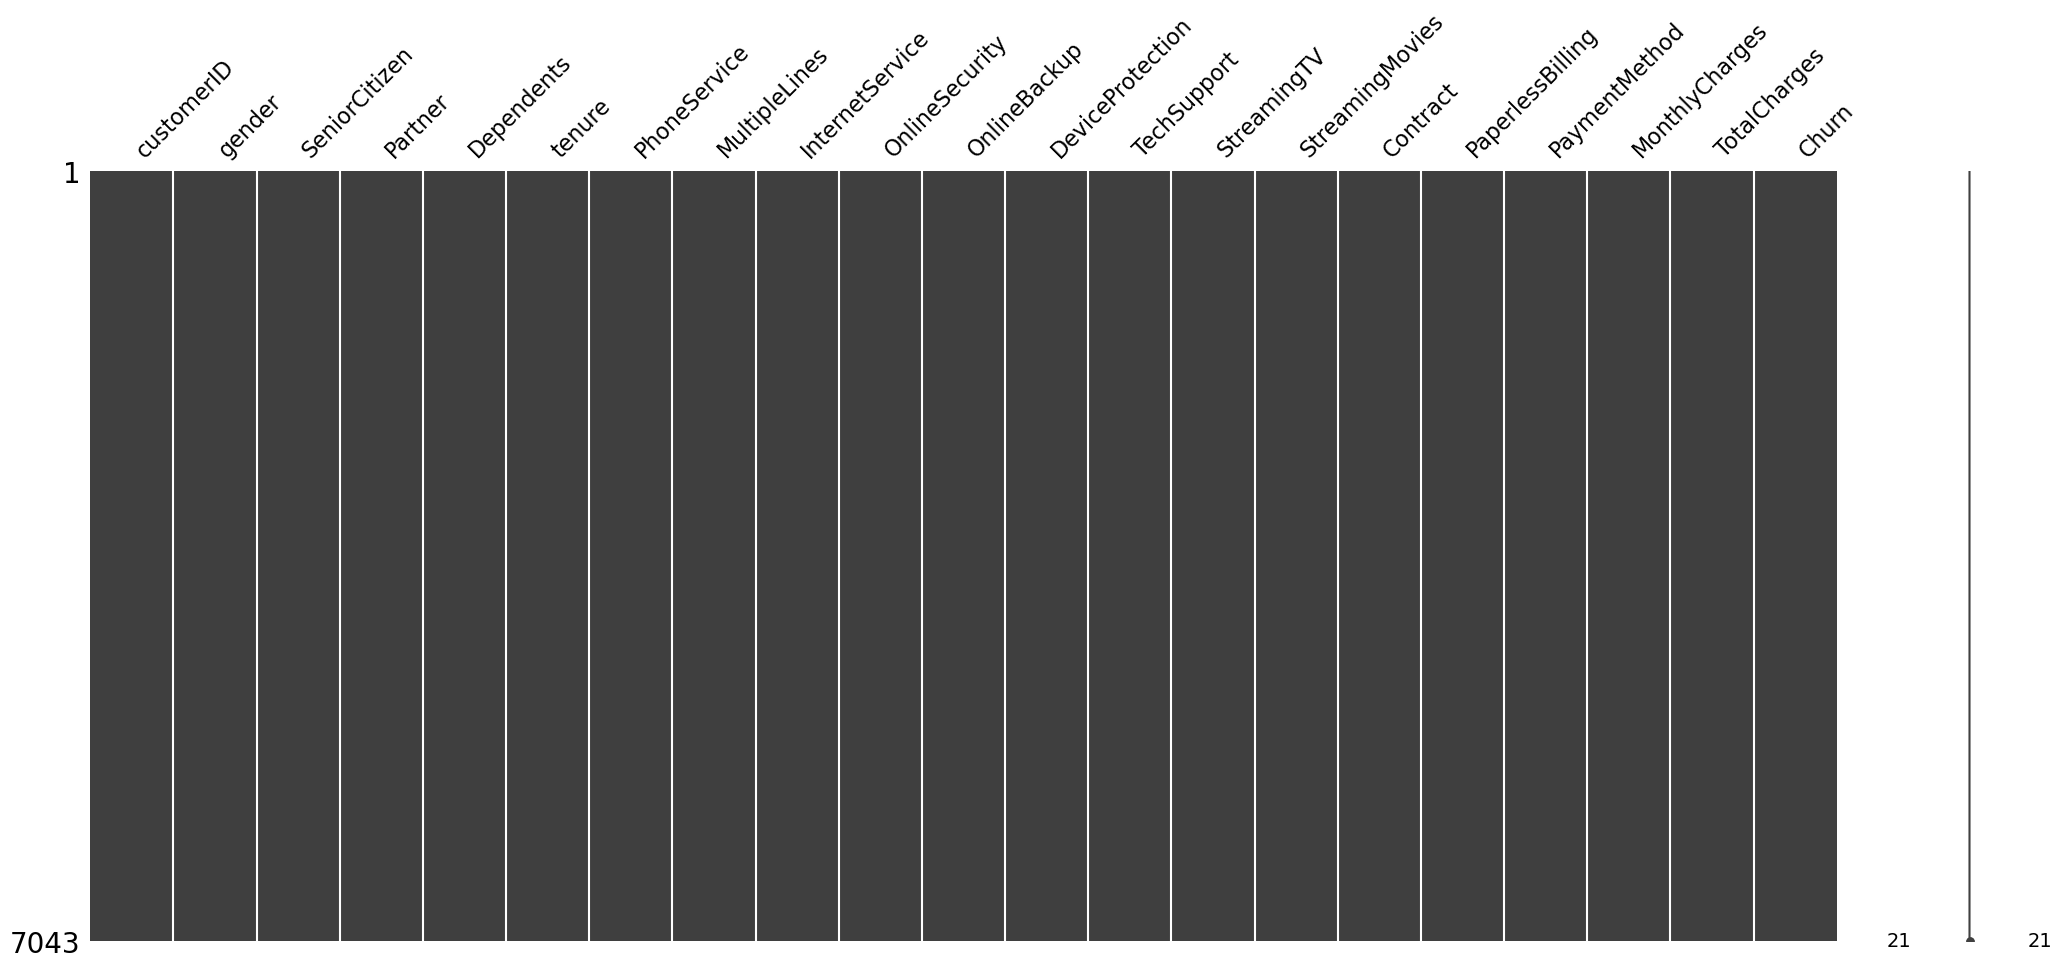

In [14]:
msno.matrix(df)

for feature in df.columns:
    percentage_missing = df[feature].isnull().sum()/df.shape[0]*100
    if percentage_missing > 0:
        percentage_formatted = "{:.3f}".format(percentage_missing)
        print (f'{feature}: {percentage_formatted}%')

In [15]:
df.duplicated().sum()

0

#### Thus far, we have observed that:

- The dataset is clean, with no missing or duplicate values.
- SeniorCitizen is a categorical feature.
- TotalCharges should be treated as a numerical feature.

### Manipulate the data <a id="manipulate-the-data"/>

In [17]:
df.drop('customerID',axis=1,inplace=True)
df['CAT_SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})
df['NUM_TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [18]:
print('SenionCitizen nulls created:', df['CAT_SeniorCitizen'].isnull().sum())
print('TotalCharges nulls created:',df['NUM_TotalCharges'].isnull().sum())

SenionCitizen nulls created: 0
TotalCharges nulls created: 11


In [19]:
df.loc[df['NUM_TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CAT_SeniorCitizen,NUM_TotalCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,No,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,No,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,No,No,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,No,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,No,No,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,No,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,No,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,No,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,No,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,,No,No,NaN


In [20]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

As we can see totalCharges are null where tenure is 0. Let's make totalCharges include the next charge that the user will pay in the future.

In [21]:
df['NUM_TotalCharges'].fillna(0,inplace=True)
df['TotalCharges']=df['NUM_TotalCharges']+df['MonthlyCharges']
df['SeniorCitizen']=df['CAT_SeniorCitizen']
df.drop(['NUM_TotalCharges','CAT_SeniorCitizen'],axis=1,inplace=True)

In [22]:
df.duplicated().sum()

22

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
def count_outliers(feature):
    data = df[feature]
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    # Define lower and upper cutoff for outliers
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = [value for value in data if value < lower_cutoff or value > upper_cutoff]
    
    return len(outliers)

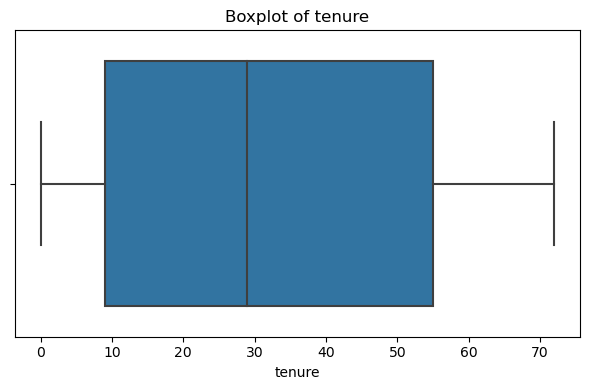

tenure outliers detected: 0


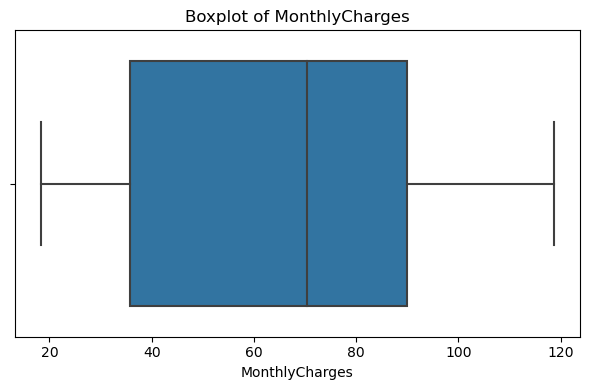

MonthlyCharges outliers detected: 0


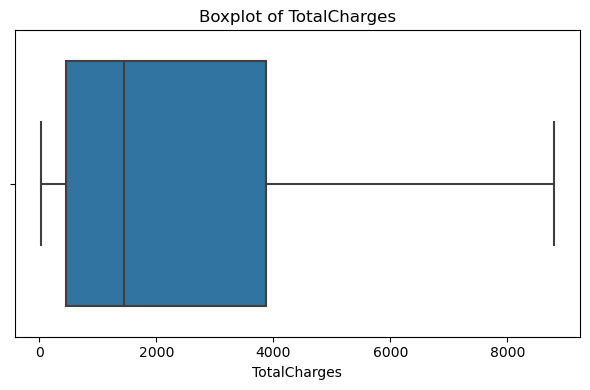

TotalCharges outliers detected: 0


In [25]:
num_features = df.select_dtypes(include=np.number).columns
cat_features = df.select_dtypes(include=object).columns

for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=feature)
    plt.title("Boxplot of {}".format(feature))
    plt.tight_layout()
    plt.show()
    
    outliers=count_outliers(feature)
    print(f'{feature} outliers detected: {outliers}')

### Visualization of the data <a id="visualize-the-data">
    

In [26]:
def plot_pie_chart(feature):
    labels = df[feature].unique()
    values = df[feature].value_counts()
    
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False,
                                      wedgeprops=dict(width=0.6))
    center_circle = plt.Circle((0, 0), 0.3, color='white')
    fig.gca().add_artist(center_circle)
    
    ax.set_title(f'{feature} Distribution')
    ax.axis('equal')
    plt.show()

def plot_grouped_bar(feature, default='Churn'):
    data = df.groupby([feature, default]).size().reset_index(name='Count')
    sns.catplot(data=data, kind="bar", x=feature, y="Count", hue=default, errorbar=None, alpha=.6, height=6)
    plt.title(f'{feature} regarding {default}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
    
def plot_stacked_bar(feature, default='Churn'):
    df.groupby([feature, default]).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'{feature} regarding {default}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_kde(feature):
    ax = sns.kdeplot(data=df, x=feature, hue='Churn', hue_order=['No', 'Yes'], multiple='stack')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.set_title(f'Distribution of {feature} regarding churn')
    plt.show()

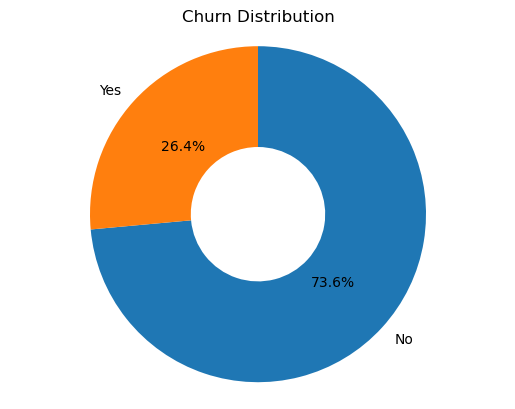

In [27]:
plot_pie_chart('Churn')

This dataset is imbalanced.


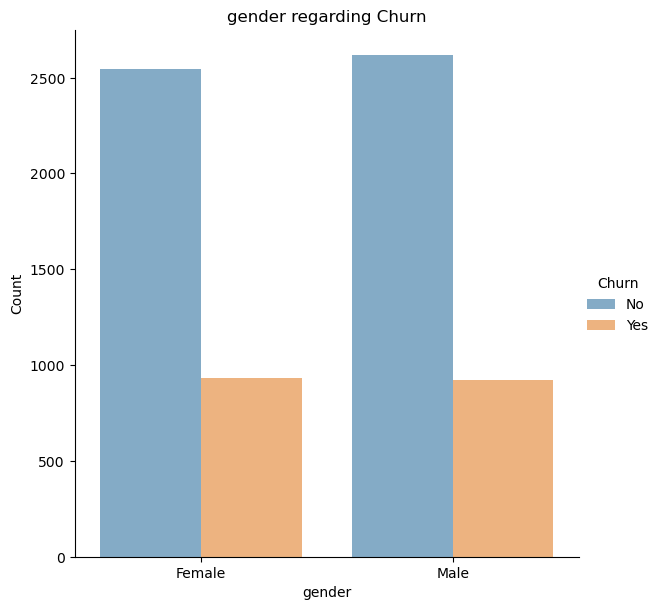

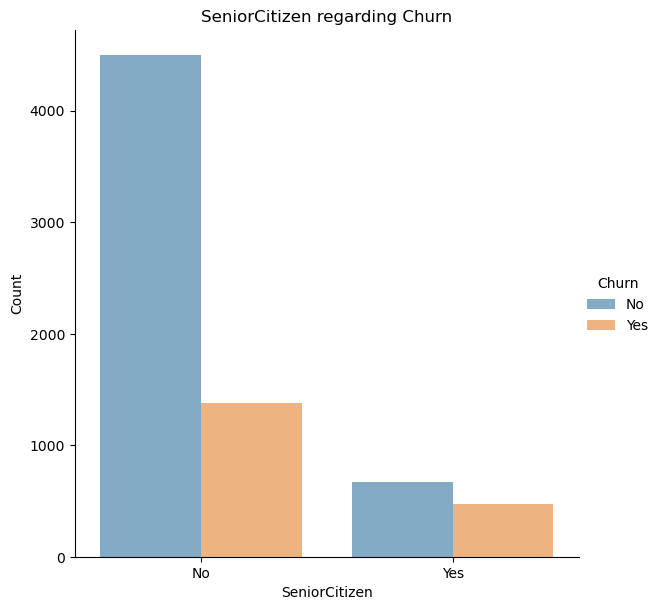

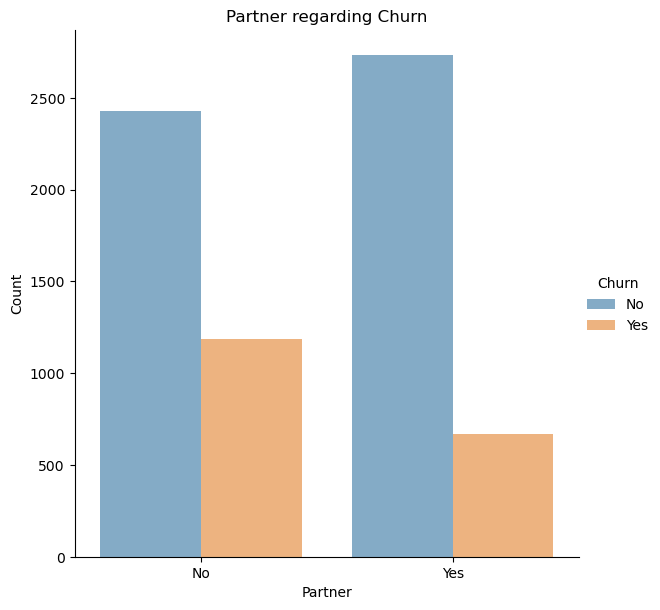

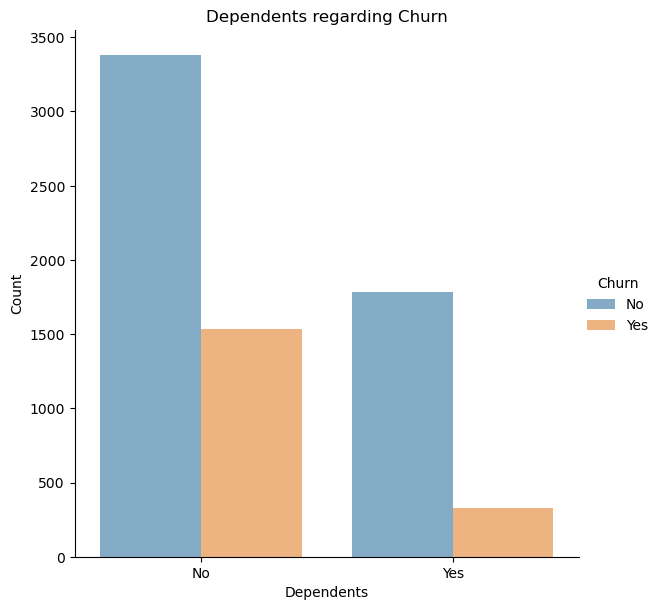

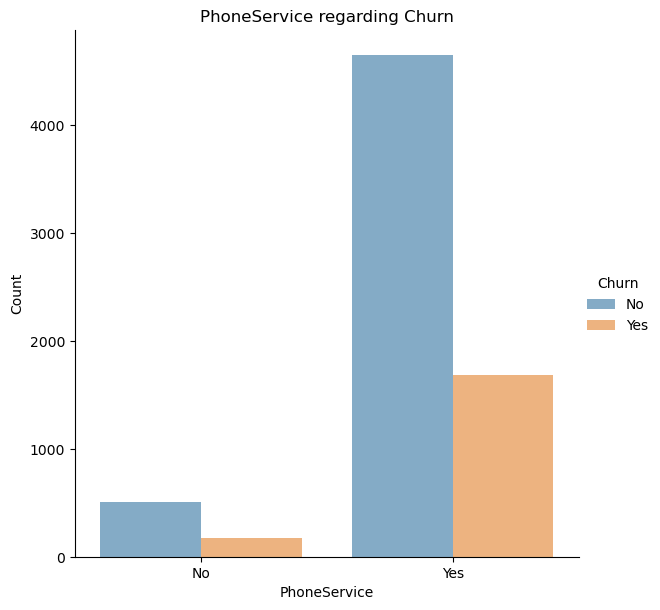

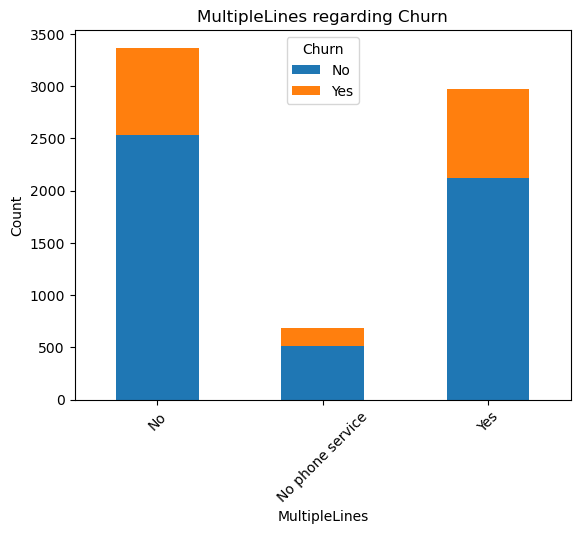

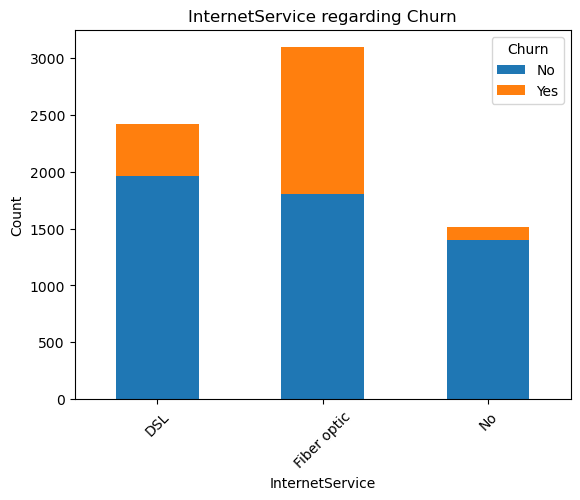

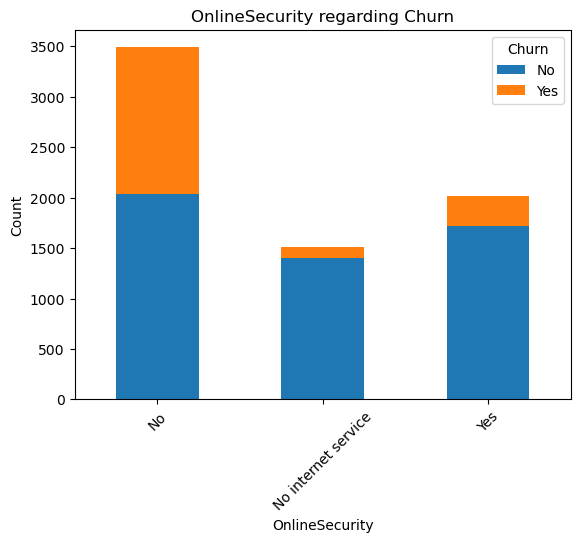

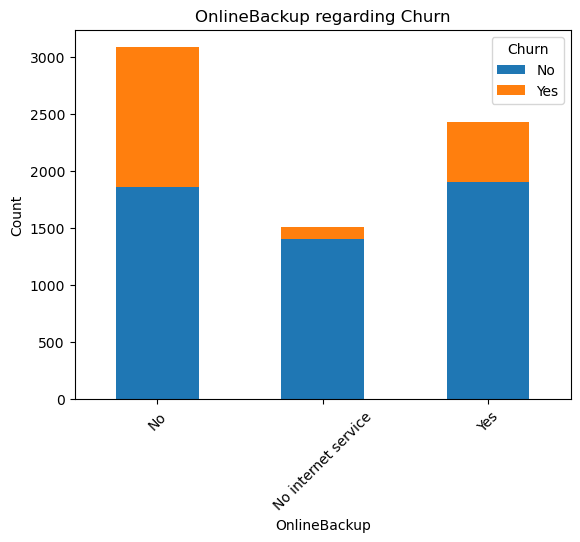

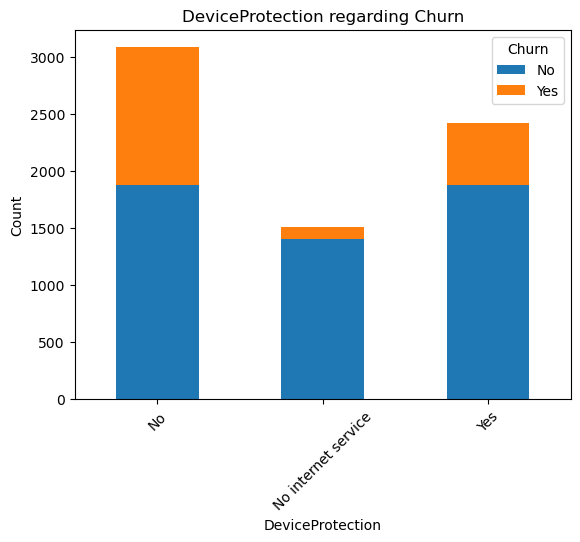

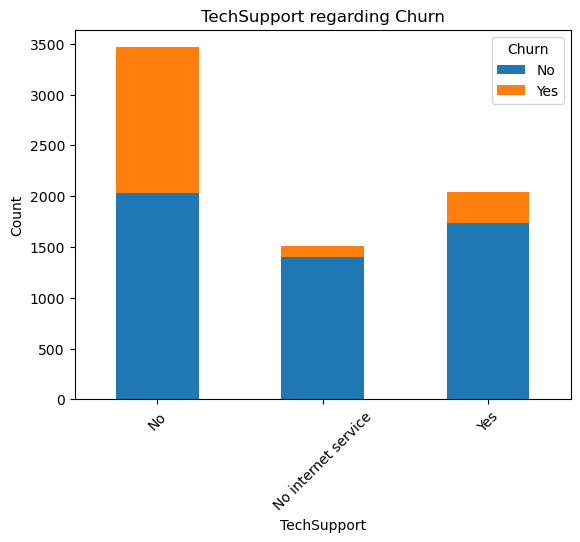

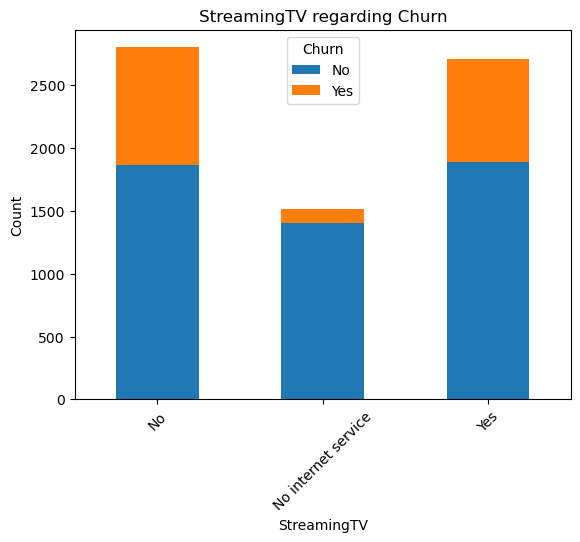

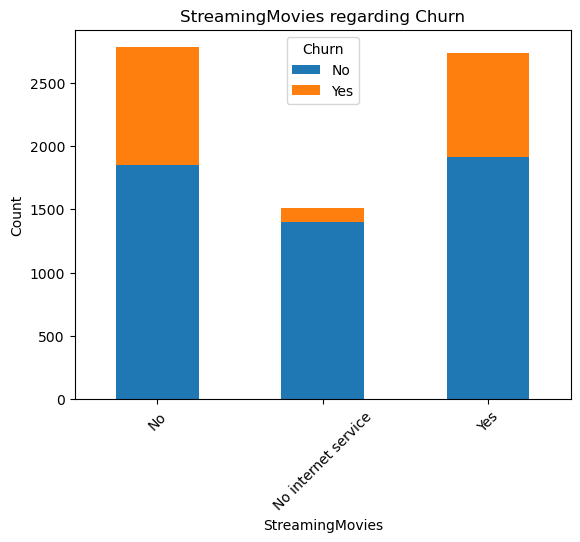

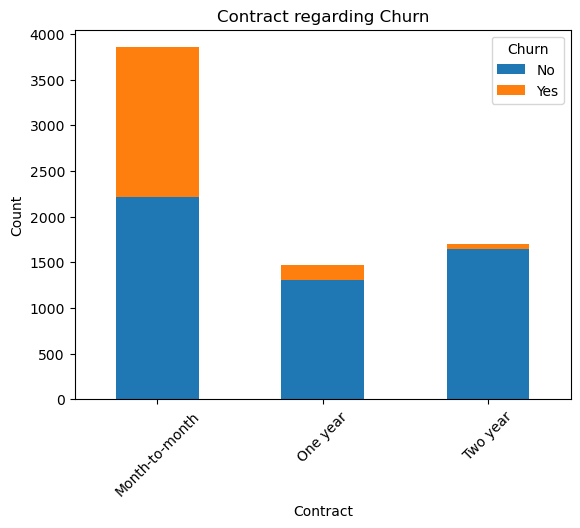

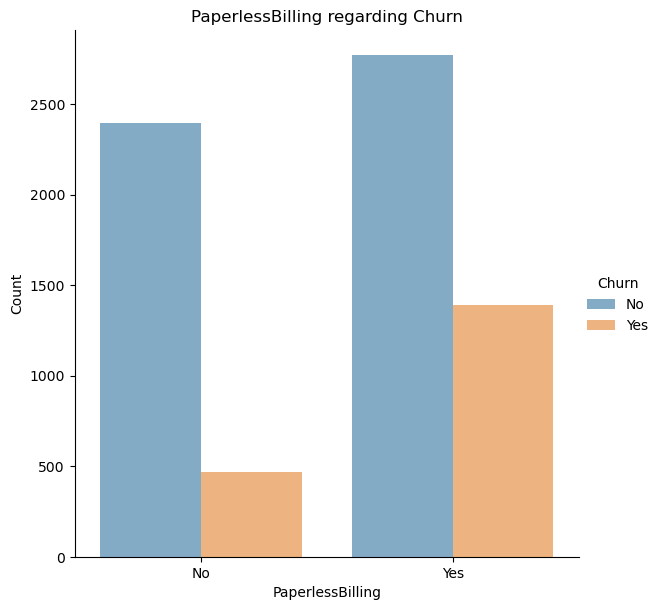

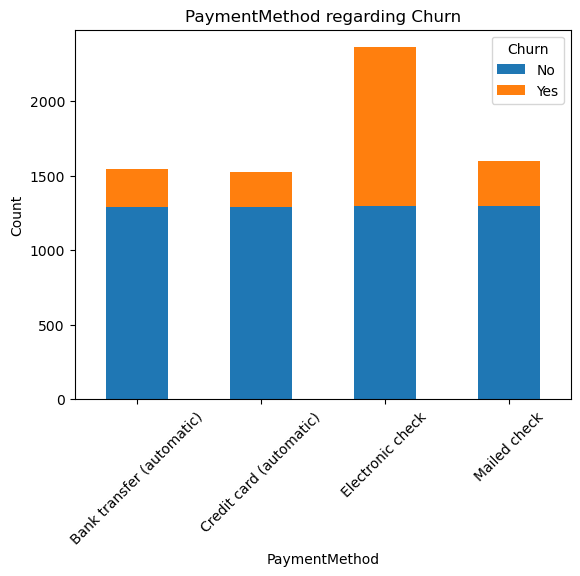

In [28]:
for feature in cat_features[:-1]:
    if df[feature].nunique()<3:
        plot_grouped_bar(feature)
    else:
        plot_stacked_bar(feature)

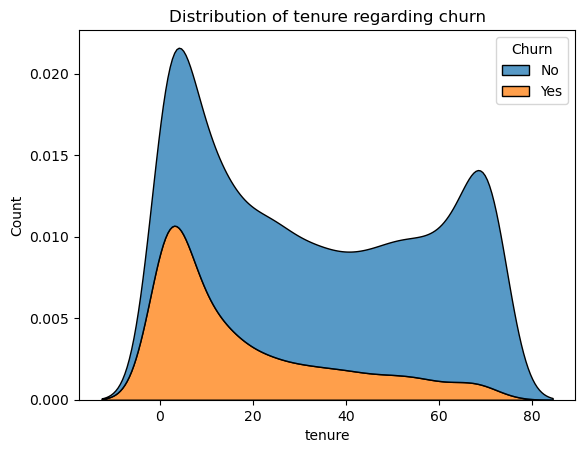

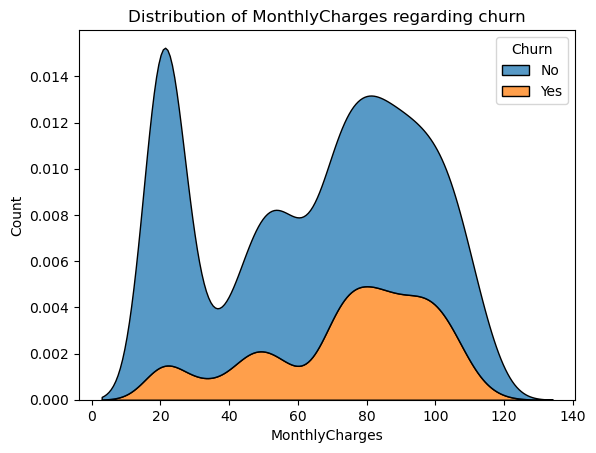

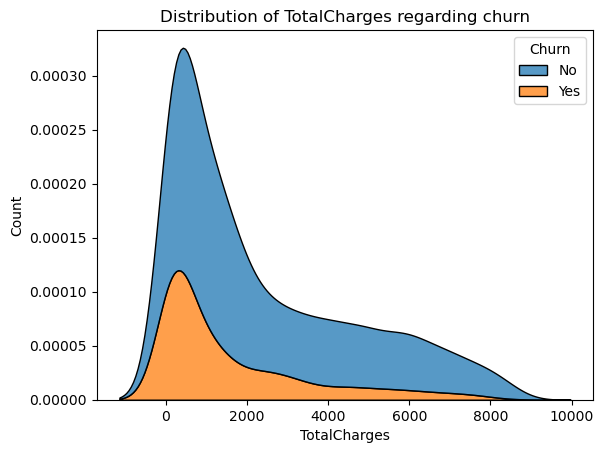

In [29]:
for feature in num_features:
    plot_kde(feature)

Key Insights from the Data
- Class Imbalance: The dataset exhibits a class imbalance, with a significant disparity between churned and non-churned customers.
- Senior Citizen Churn: Senior citizens demonstrate a higher propensity to churn, with a rate of nearly 50%.
- Fiber Optic Churn: Despite its popularity, Fiber optic service has a substantial churn rate, with almost half of its users churning.
- Supplementary Services and Churn: Customers without additional services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more likely to churn.
- Streaming Service Impact: Streaming Services seem to have a minimal impact on churn rates.
- Contract Type and Churn: Month-to-month contracts are associated with higher churn rates compared to one or two-year contracts.
- Paperless Billing and Churn: A significant portion of customers with PaperlessBilling tend to churn.
- Payment Method and Churn: While Electronic Check is a popular payment method, it's associated with a higher churn rate compared to Automatic Payments.
- Tenure and Churn: Early-tenure customers are more likely to churn.
- Monthly Charges and Churn: Higher Monthly Charges correlate with higher churn rates.
- Total Charges and Churn: Customers with higher TotalCharges tend to be less likely to churn.

# 4. Feature Engineering <a id="feature-engineering">

In [30]:
SEED = 42

In [31]:
# Convert target feature to 0,1
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [32]:
# Split the data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.30, random_state = SEED)

In [33]:
print("Train set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Train set shapes: (4914, 19) (4914,)
Test set shapes: (2107, 19) (2107,)


### Encode categorical features <a id="encode-categorical-features">

In [34]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']

In [35]:
# One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
data = encoder.fit_transform(X_train[cat_cols])
feature_names = encoder.get_feature_names_out()

In [36]:
print('Number of categorical columns before OHE:', len(cat_cols))
print('Number of categorical columns after OHE:', len(feature_names))

Number of categorical columns before OHE: 16
Number of categorical columns after OHE: 27


### Scale numerical features <a id="scale-numerical-features">

In [37]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [38]:
def plot_before_after_scale(normal, scaled, feature, scaler_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    
    plt.sca(axes[0])
    sns.kdeplot(normal[feature], color='#008080', fill= True, alpha=.7, linewidth=0)
    axes[0].set(title = "Before scaling")
    axes[0].set_xlabel(feature)

    plt.sca(axes[1])
    sns.kdeplot(scaled[feature], color='#FF6347', fill= True, alpha=.7, linewidth=0)
    axes[1].set(title = f"After scaling using {scaler_name}")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

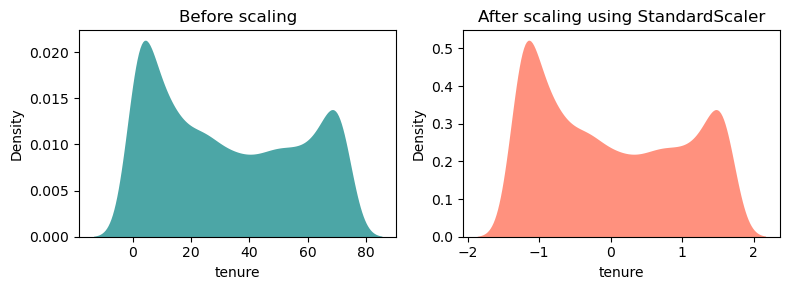

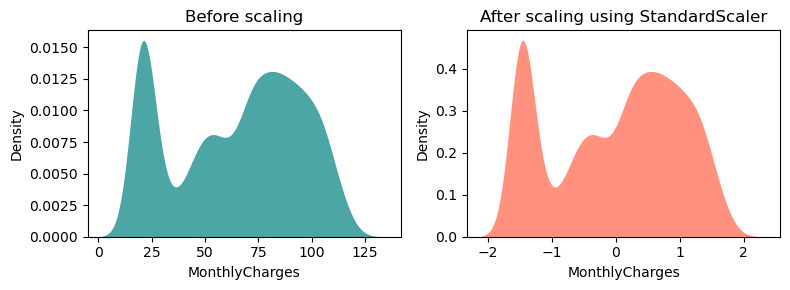

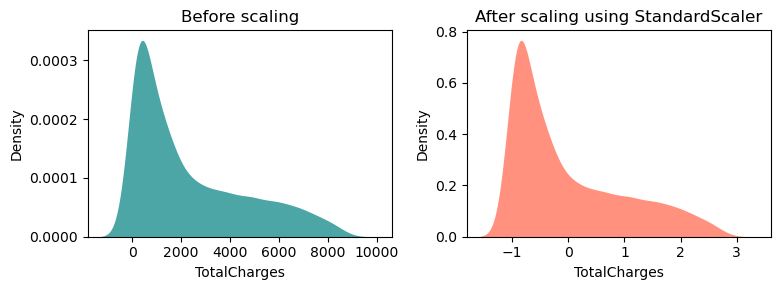

In [40]:
### Standard Scaler
scaler = StandardScaler()
data = scaler.fit_transform(X_train[num_cols])
scaled_df = pd.DataFrame(data, columns=num_cols)
for feature in num_cols:
    plot_before_after_scale(X_train, scaled_df, feature, 'StandardScaler')

In [41]:
### Create a transformer
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols),
    (StandardScaler(), num_features),
    remainder='passthrough'
)

In [42]:
### Transform
transformed = transformer.fit_transform(X_train)
### Create the transformed dataset
transformed_X_train = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_X_train.head()

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No internet service,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,standardscaler__tenure,standardscaler__MonthlyCharges,standardscaler__TotalCharges
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.925998,1.296031,1.491155
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.543109,0.828594,-0.215178
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.992003,1.211194,-0.610867
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.293275,-1.342246,-0.313418
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.277663,-1.496949,-1.005640


### Handle imbalanced data <a id="handle-imbalanced-data">

In [43]:
resamping = SMOTE(random_state=SEED)
_, y_train_res = resamping.fit_resample(transformed_X_train, y_train)

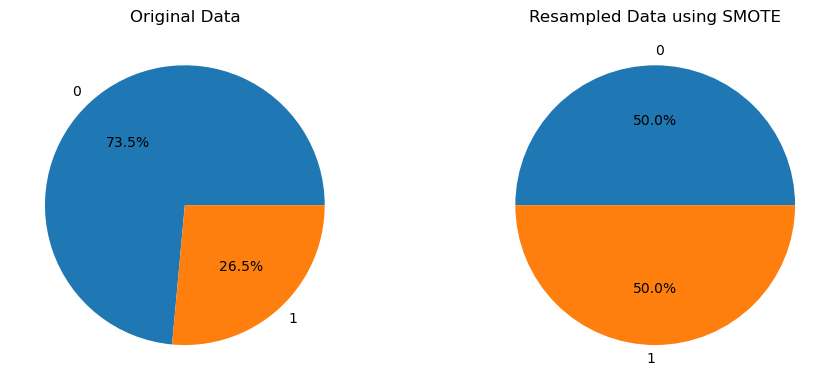

Before SMOTE:
Class 0: 3614
Class 1: 1300

After SMOTE:
Class 0: 3614
Class 1: 3614


In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plotting pie chart for original data
axes[0].pie([sum(y_train == 0), sum(y_train == 1)], labels=[0, 1], autopct='%1.1f%%')
axes[0].set_title("Original Data")

# Plotting pie chart for resampled data
axes[1].pie([sum(y_train_res == 0), sum(y_train_res == 1)], labels=[0, 1], autopct='%1.1f%%')
axes[1].set_title(f"Resampled Data using SMOTE")

plt.tight_layout()
plt.show()

print(f"Before SMOTE:")
print("Class 0:", sum(y_train == 0))
print("Class 1:", sum(y_train == 1))

print(f"\nAfter SMOTE:")
print("Class 0:", sum(y_train_res == 0))
print("Class 1:", sum(y_train_res == 1))

# 5. Model Selection <a id="model-selection">

We will prioritize models that strike a balanced performance between recall and precision. However, our primary focus will be on maximizing recall, as accurately identifying customers who are likely to churn is of greater importance to us than potentially misclassifying a customer as churned.

### Models creation and cross validation <a id="models-cross-validation">

In [45]:
models = {
    'Logistic Regression': LogisticRegression(random_state=SEED),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=SEED),
    'AdaBoost': AdaBoostClassifier(random_state=SEED),
    'Gradient Boosting': GradientBoostingClassifier(random_state=SEED),
}

scoring = {
    'f1': make_scorer(f1_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'precision': make_scorer(precision_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score)
}

scoreboard=pd.DataFrame(columns=[
    'Model', 'Resample', 
    'Avg F1', 'Avg Recall',
    'Avg Precision', 'Accuracy'
])
# scoreboard.drop(scoreboard.index,inplace=True)

In [46]:
def get_model_cross_val(pipeline, X, y, metrics):
    cv_results = cross_validate(pipeline, X, y, scoring = metrics)
    
    f1_score = cv_results['test_f1'].mean()
    recall_score = cv_results['test_recall'].mean()
    precision_score = cv_results['test_precision'].mean()
    accuracy_score = cv_results['test_accuracy'].mean()
    
    model_name= pipeline.named_steps['model'].__class__.__name__
    res_name= 'None' if isinstance(pipeline.named_steps['resample'], type(None)) \
                        else pipeline.named_steps['resample'].__class__.__name__

        
    data = [(model_name,res_name, precision_score, recall_score, f1_score, accuracy_score)]
    model_scores = pd.DataFrame(data = data, columns=['Model','Resample', 'Avg Precision', 'Avg Recall',
                                                         'Avg F1', 'Accuracy'])
    
    return model_scores

In [47]:
original_data_scoreboard = scoreboard.copy()
for model in models.values():
    pipeline = Pipeline_imb([
        ('transformer', transformer),
        ('resample', None),
        ('model', model)
    ])
    model_scores = get_model_cross_val(pipeline, X_train, y_train, scoring)
    original_data_scoreboard = pd.concat([original_data_scoreboard, model_scores], ignore_index=True)

In [51]:
original_data_scoreboard.style.background_gradient(cmap='YlGnBu')

,Model,Resample,Avg F1,Avg Recall,Avg Precision,Accuracy
0,LogisticRegression,None,0.590012,0.540000,0.650745,0.801378
1,KNeighborsClassifier,None,0.545090,0.530769,0.561216,0.766175
2,RandomForestClassifier,None,0.542583,0.472308,0.640825,0.789779
3,AdaBoostClassifier,None,0.590123,0.533846,0.660066,0.804025
4,GradientBoostingClassifier,None,0.579777,0.514615,0.664240,0.802599


Upon validation, it appears that Logistic Regression, Adaboost Classifier, and Gradient Boosting Classifier demonstrate the most promising results using the original dataset, aligning well with our specific criteria and objectives.

In [54]:
upsampled_data_scoreboard = scoreboard.copy()
for model in models.values():
    pipeline = Pipeline_imb([
        ('transformer', transformer),
        ('resample', SMOTE(random_state=SEED)),
        ('model', model)
    ])
    model_scores = get_model_cross_val(pipeline, X_train, y_train, scoring)
    upsampled_data_scoreboard = pd.concat([upsampled_data_scoreboard, model_scores], ignore_index=True)

In [55]:
upsampled_data_scoreboard.style.background_gradient(cmap='YlGnBu')

,Model,Resample,Avg F1,Avg Recall,Avg Precision,Accuracy
0,LogisticRegression,SMOTE,0.629796,0.804615,0.517454,0.749694
1,KNeighborsClassifier,SMOTE,0.562377,0.740000,0.453735,0.695766
2,RandomForestClassifier,SMOTE,0.586516,0.574615,0.600271,0.786117
3,AdaBoostClassifier,SMOTE,0.627680,0.740769,0.544814,0.767804
4,GradientBoostingClassifier,SMOTE,0.629038,0.675385,0.588843,0.789375


The upsampled data has led to enhancements in the performance of the models under consideration. While there may have been a slight reduction in precision, the gains in recall and F1 score are notable. 

In [57]:
final_scoreboard = pd.concat([original_data_scoreboard, upsampled_data_scoreboard], 
                             ignore_index=True)
final_scoreboard.sort_values(by="Avg Recall",
                   ascending=False).style.background_gradient(cmap='YlGnBu')

,Model,Resample,Avg F1,Avg Recall,Avg Precision,Accuracy
5,LogisticRegression,SMOTE,0.629796,0.804615,0.517454,0.749694
8,AdaBoostClassifier,SMOTE,0.627680,0.740769,0.544814,0.767804
6,KNeighborsClassifier,SMOTE,0.562377,0.740000,0.453735,0.695766
9,GradientBoostingClassifier,SMOTE,0.629038,0.675385,0.588843,0.789375
7,RandomForestClassifier,SMOTE,0.586516,0.574615,0.600271,0.786117
0,LogisticRegression,None,0.590012,0.540000,0.650745,0.801378
3,AdaBoostClassifier,None,0.590123,0.533846,0.660066,0.804025
1,KNeighborsClassifier,None,0.545090,0.530769,0.561216,0.766175
4,GradientBoostingClassifier,None,0.579777,0.514615,0.664240,0.802599
2,RandomForestClassifier,None,0.542583,0.472308,0.640825,0.789779


After careful evaluation of both the original and upsampled datasets, we have selected Logistic Regression and Adaboost Classifier for further optimization. These models have demonstrated strong performance metrics, particularly high precision and good F1-scores. Although Logistic Regression may have lower precision, it excels in recall, which is a crucial metric for our use case.

While the Gradient Boosting Classifier also performed well, we've decided to prioritize Logistic Regression and Adaboost due to their superior recall performance and potential for further optimization

### Best models evaluation <a id="best-models-evaluation">

In [58]:
def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    model_name= pipeline.named_steps['model'].__class__.__name__
    res_name= 'None' if isinstance(pipeline.named_steps['resample'], type(None)) \
                        else pipeline.named_steps['resample'].__class__.__name__
    
    cm = confusion_matrix(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    report = classification_report(y_test, y_pred)
    
    print(f'{model_name}:')
    print('==============================')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    
    plt.sca(axes[0])
    plot_confusion_matrix(cm)
    
    plt.sca(axes[1])
    plot_roc_curve(y_pred_prob, fpr, tpr, thresholds)
    
    plt.tight_layout()
    plt.show()
    
    print(report)
    
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    
def plot_roc_curve(y_pred_prob, fpr, tpr, thresholds):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color="r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve', fontsize=16)

LogisticRegression:


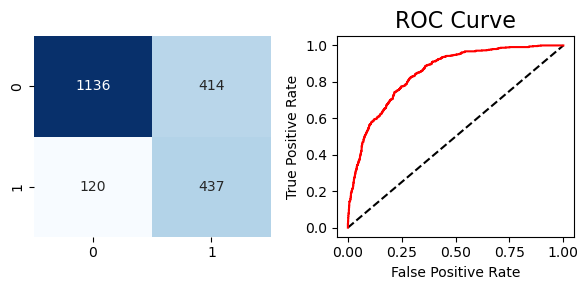

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1550
           1       0.51      0.78      0.62       557

    accuracy                           0.75      2107
   macro avg       0.71      0.76      0.72      2107
weighted avg       0.80      0.75      0.76      2107



In [59]:
pipeline = Pipeline_imb([
        ('transformer', transformer),
        ('resample', SMOTE(random_state=SEED)),
        ('model', LogisticRegression(random_state=SEED))
    ])
pipeline.fit(X_train,y_train)
model_evaluation(pipeline, X_test, y_test)

AdaBoostClassifier:


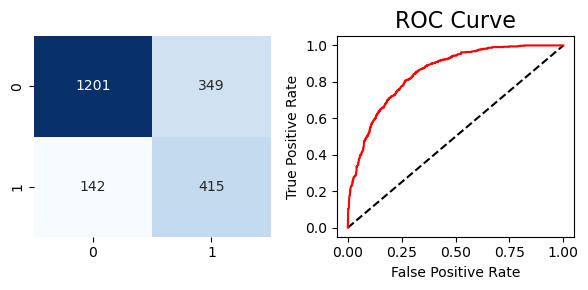

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1550
           1       0.54      0.75      0.63       557

    accuracy                           0.77      2107
   macro avg       0.72      0.76      0.73      2107
weighted avg       0.80      0.77      0.78      2107



In [60]:
pipeline = Pipeline_imb([
        ('transformer', transformer),
        ('resample', SMOTE(random_state=SEED)),
        ('model', AdaBoostClassifier(random_state=SEED))
    ])
pipeline.fit(X_train,y_train)
model_evaluation(pipeline, X_test, y_test)

Both models, AdaBoostClassifier and LogisticRegression, exhibited strong performance during evaluation. While AdaBoostClassifier demonstrated a slightly higher F1-score, LogisticRegression excelled in terms of recall.

# 6. Fine-Tune Best Models <a id="fine-tune-best-models">

We aim for a balanced trade-off between recall and precision in our models.To achieve a balanced performance between recall and precision, we will utilize the F1-score as our primary evaluation metric during grid search. Prioritizing recall excessively could lead to a significant decline in precision, which might not be optimal for our specific use case. Therefore, we aim to find a model that strikes a balance between both metrics.

In [63]:
pipeline = Pipeline_imb([
    ('transformer',transformer),
    ('resample',SMOTE(random_state=SEED)),
    ('model', LogisticRegression(random_state=SEED))
])

params = {
    'model__penalty': ['l1','l2'],
    'model__C': [0.01, 0.1, 1.0, 10.0], 
    'model__solver':['lbfgs','liblinear','saga'],
    'model__max_iter':[*range(100,1100,100)]
}

gscv = GridSearchCV(estimator=pipeline, param_grid=params, 
                      scoring='f1', n_jobs=-1)
gscv.fit(X, y);

In [62]:
best_params = gscv.best_params_
print('AdaBoost Classifier best params:\n', best_params)
# {'model__estimator': DecisionTreeClassifier(max_depth=1), 'model__estimator__max_depth': 1, 'model__estimator__min_samples_leaf': 1, 'model__estimator__min_samples_split': 2, 'model__learning_rate': 0.1, 'model__n_estimators': 200}

AdaBoost Classifier best params:
 {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


LogisticRegression:


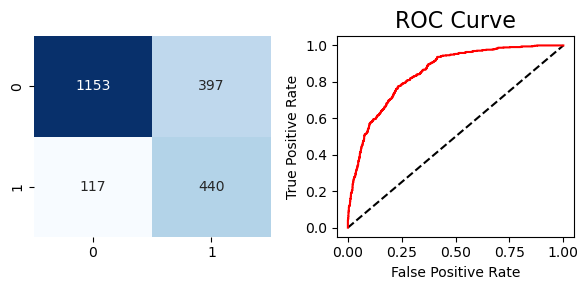

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1550
           1       0.53      0.79      0.63       557

    accuracy                           0.76      2107
   macro avg       0.72      0.77      0.72      2107
weighted avg       0.81      0.76      0.77      2107



In [64]:
best_model = gscv.best_estimator_
model_evaluation(best_model, X_test,y_test)

Both optimized models demonstrate strong recall performance. However, the Logistic Regression model slightly outperforms the other tuned model by correctly classifying one additional customer in the test dataset.

# 7. Conclusion <a id="conclusion">

### Data insights <a id="data-insights"></a>
The analysis of the data has provided valuable insights into customer churn behavior.
Our analysis has revealed several key factors influencing customer churn:

- Demographic Factors: Senior citizens exhibit a higher propensity to churn.
- Service Features: Customers with Fiber optic connections and those without essential support services like Online Security and Tech Support are more likely to churn.
- Contractual Terms: Month-to-month contracts are associated with higher churn rates compared to longer-term contracts.
- Payment Method: Electronic check payments have a higher churn rate than automatic payments.
- Customer Tenure: Early-tenure customers are more susceptible to churn.
- Pricing Strategy: Higher monthly charges can lead to increased churn.

### Model choice <a id="model-choice"></a>
After careful evaluation of various models and consideration of performance metrics, we have chosen to focus on fine-tuning the Logistic Regression and Adaboost Classifier models. These models exhibit a good performance, particularly in terms of recall, which aligns with our primary objective of accurately identifying potential churners.

By prioritizing recall, we aim to accurately identify customers at risk of churning, thereby enabling targeted retention strategies. This approach will help minimize the risk of false negatives and maximize the effectiveness of our customer retention efforts.